___

<p style="text-align: center;"><img src="https://techproeducation.com/wp-content/uploads/2022/01/Calisma-Yuzeyi-1-kopya-5-1-768x126.png" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***.

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# #Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com)in 2019, contains many features of 9 different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project. You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method.

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression
#### 6. Implement Elastic-Net
#### 7. Visually Compare Models Performance In a Graph

## 1. Import Modules, Load Data and Data Review

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.rcParams["figure.figsize"] = (10, 6)
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import PredictionError
from sklearn.linear_model import Ridge
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("final_scout_not_dummy.csv")

## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

In [ ]:
df.head(5)

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,...,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...",...,2.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1220.0,front,3.8
1,Audi A1,Sedans,14500,Price negotiable,80000.0,Used,Benzine,7.0,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...",...,1.0,141.0,0,Metallic,Cloth,Automatic,1798.0,1255.0,front,5.6
2,Audi A1,Sedans,14640,VAT deductible,83450.0,Used,Diesel,7.0,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer",...,1.0,85.0,0,Metallic,Cloth,Automatic,1598.0,1135.0,front,3.8
3,Audi A1,Sedans,14500,VAT deductible,73000.0,Used,Diesel,6.0,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...",...,1.0,66.0,0,Metallic,Cloth,Automatic,1422.0,1195.0,front,3.8
4,Audi A1,Sedans,16790,VAT deductible,16200.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",...,1.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1135.0,front,4.1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

In [ ]:
df.duplicated().sum()

1673

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
numeric_col = df.select_dtypes(include='number').drop('Inspection_new', axis=1)

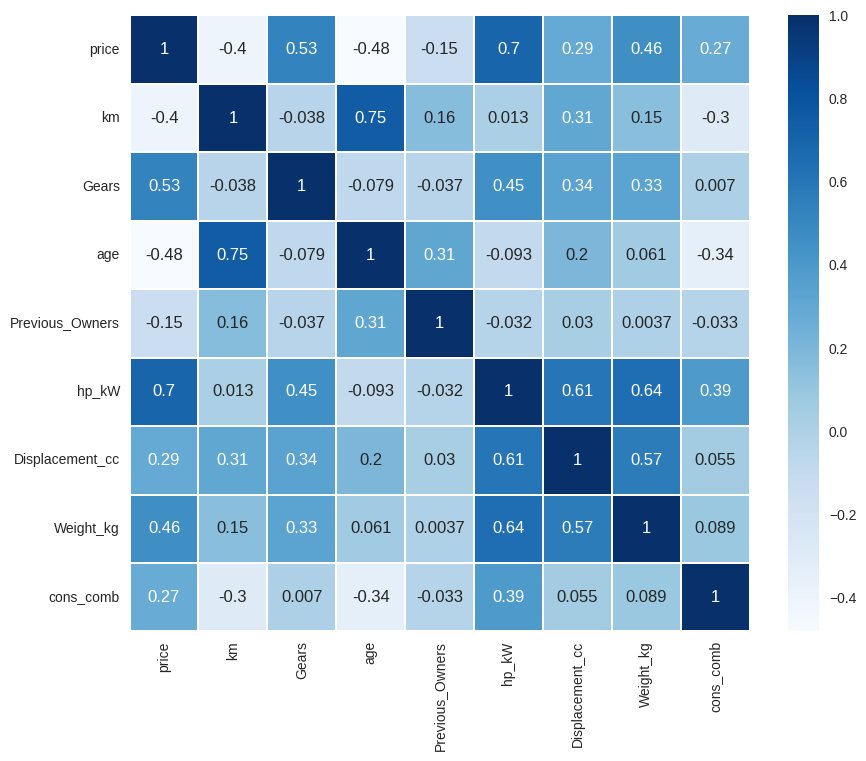

In [ ]:
plt.figure(figsize=(10, 8))

sns.heatmap(numeric_col.corr(), annot=True, cmap="Blues", linewidths=0.2, annot_kws={"size": 12});

In [ ]:
target = 'price'

corr_by_target = numeric_col.corr()[target].sort_values()
corr_by_target

age               -0.481426
km                -0.402373
Previous_Owners   -0.148630
cons_comb          0.273551
Displacement_cc    0.287056
Weight_kg          0.460120
Gears              0.528101
hp_kW              0.697984
price              1.000000
Name: price, dtype: float64

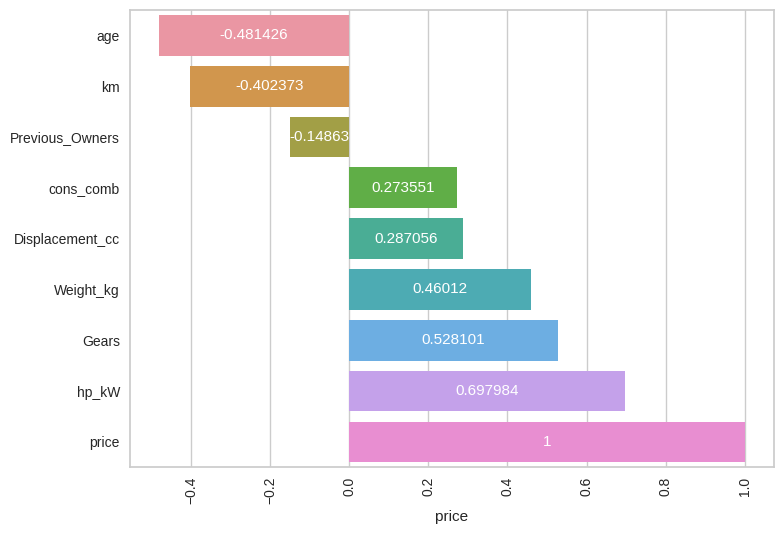

In [ ]:
ax = sns.barplot(y = corr_by_target.index, x = corr_by_target)
plt.xticks(rotation=90)
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container, fontsize=11, rotation=0, label_type='center', color="white")

<Axes: >

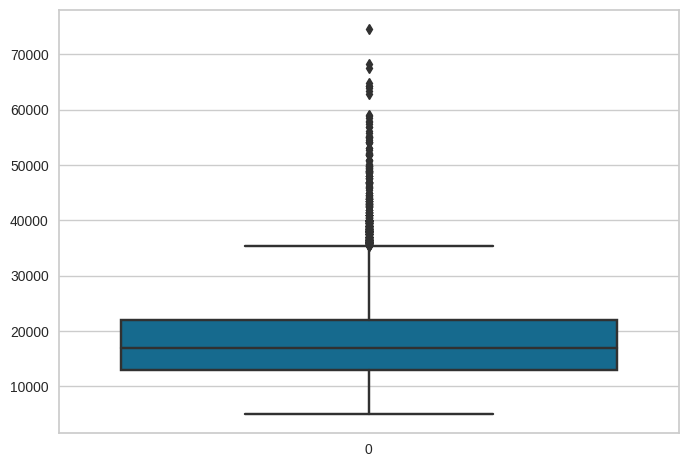

In [ ]:
sns.boxplot(numeric_col.price)

## 3. Implement Linear Regression

 - Import the modul
 - Fit the model
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics

*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
df1 = numeric_col
df1.head(5)

,price,km,Gears,age,Previous_Owners,hp_kW,Displacement_cc,Weight_kg,cons_comb
0,15770,56013.0,7.0,3.0,2.0,66.0,1422.0,1220.0,3.8
1,14500,80000.0,7.0,2.0,1.0,141.0,1798.0,1255.0,5.6
2,14640,83450.0,7.0,3.0,1.0,85.0,1598.0,1135.0,3.8
3,14500,73000.0,6.0,3.0,1.0,66.0,1422.0,1195.0,3.8
4,16790,16200.0,7.0,3.0,1.0,66.0,1422.0,1135.0,4.1


In [ ]:
len(df1)

14242

In [ ]:
X = df1.drop(['price'], axis= 1)
y = df1["price"]

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
print("X Train features shape: {}\ny Train features shape: {}\nX Test features shape : {}\nY Test features shape : {}".format
      (X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X Train features shape: (12817, 8)
y Train features shape: (12817,)
X Test features shape : (1425, 8)
Y Test features shape : (1425,)


## Linear Regression

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_train_pred=lin_reg.predict(X_train)

In [ ]:
y_pred = lin_reg.predict(X_test)

In [ ]:
def train_val(y_train, y_train_pred, y_test, y_pred, i):

    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},

    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}

    return pd.DataFrame(scores)

In [ ]:
ls = train_val(y_train,y_train_pred, y_test, y_pred, "linear")
ls

,linear_train,linear_test
R2,7.529083e-01,7.532335e-01
mae,2.724572e+03,2.752080e+03
mse,1.346141e+07,1.489819e+07
rmse,3.668980e+03,3.859818e+03


#Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
y_pred_scaled = lin_reg.predict(X_test_scaled)
y_train_scaled_pred = lin_reg.predict(X_train_scaled)

In [ ]:
ls_scale = train_val(y_train,y_train_scaled_pred, y_test, y_pred_scaled, "LinearScale")
ls_scale

,LinearScale_train,LinearScale_test
R2,7.529083e-01,7.532335e-01
mae,2.724572e+03,2.752080e+03
mse,1.346141e+07,1.489819e+07
rmse,3.668980e+03,3.859818e+03


##Cross-Validation

In [ ]:
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.metrics import SCORERS

In [ ]:
# model is lin_reg
scores = cross_validate(lin_reg , X_train_scaled, y_train, scoring =["r2", 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 10)

In [ ]:
pd.DataFrame(scores, index = range(1,11))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.024,0.006,0.732,-2800.223,-13720056.780,-3704.060
2,0.021,0.008,0.754,-2791.221,-13446529.995,-3666.951
3,0.015,0.009,0.771,-2751.971,-13762400.754,-3709.771
4,0.016,0.005,0.756,-2655.603,-12619730.088,-3552.426
5,0.015,0.004,0.733,-2683.668,-12847384.948,-3584.325
6,0.017,0.002,0.754,-2633.708,-12356306.767,-3515.154
7,0.020,0.003,0.756,-2808.363,-14881601.480,-3857.668
8,0.018,0.004,0.740,-2821.090,-14602727.975,-3821.352
9,0.018,0.007,0.754,-2665.627,-13545165.525,-3680.376
10,0.017,0.004,0.766,-2656.504,-13091245.754,-3618.183


In [ ]:
scores = pd.DataFrame(scores, index=range(1,11))
scores.iloc[:, 2:].mean()

test_r2                                    0.752
test_neg_mean_absolute_error           -2726.798
test_neg_mean_squared_error        -13487315.007
test_neg_root_mean_squared_error       -3671.026
dtype: float64

In [ ]:
pd.concat([ls, ls_scale], axis = 1)

,linear_train,linear_test,LinearScale_train,LinearScale_test
R2,0.753,0.753,0.753,0.753
mae,2724.572,2752.080,2724.572,2752.080
mse,13461414.431,14898192.717,13461414.431,14898192.717
rmse,3668.980,3859.818,3668.980,3859.818


## 4. Implement Ridge Regression

- Import the modul
- Do not forget to scale the data or use Normalize parameter as True
- Fit the model
- Predict the test set
- Evaluate model performance (use performance metrics for regression)
- Tune alpha hiperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.

Multicolinearity

In [ ]:
def color_red(val):

    if val > 0.90 and val < 0.99:
        color = 'red'
    elif val >= 1:
        color = 'blue'
    else:
        color = 'black'
    return f'color: {color}'

In [ ]:
pd.DataFrame(df1).corr().style.applymap(color_red)


,price,km,Gears,age,Previous_Owners,hp_kW,Displacement_cc,Weight_kg,cons_comb
price,1.000000,-0.402373,0.528101,-0.481426,-0.148630,0.697984,0.287056,0.460120,0.273551
km,-0.402373,1.000000,-0.038146,0.748734,0.158776,0.013366,0.305729,0.152804,-0.295297
Gears,0.528101,-0.038146,1.000000,-0.079298,-0.036680,0.451227,0.337763,0.332270,0.006956
age,-0.481426,0.748734,-0.079298,1.000000,0.314149,-0.092948,0.197610,0.061183,-0.339087
Previous_Owners,-0.148630,0.158776,-0.036680,0.314149,1.000000,-0.031627,0.030027,0.003699,-0.033282
hp_kW,0.697984,0.013366,0.451227,-0.092948,-0.031627,1.000000,0.605758,0.641292,0.391019
Displacement_cc,0.287056,0.305729,0.337763,0.197610,0.030027,0.605758,1.000000,0.566828,0.055190
Weight_kg,0.460120,0.152804,0.332270,0.061183,0.003699,0.641292,0.566828,1.000000,0.088573
cons_comb,0.273551,-0.295297,0.006956,-0.339087,-0.033282,0.391019,0.055190,0.088573,1.000000


In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge_model = Ridge(alpha=1, random_state=42)    # alpha = 1 as default

In [ ]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=1, random_state=42)

In [ ]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

In [ ]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

,ridge_train,ridge_test
R2,0.753,0.753
mae,2724.579,2752.082
mse,13461414.834,14898292.714
rmse,3668.980,3859.831


In [ ]:
pd.concat([ls, ls_scale,rs], axis = 1)


,linear_train,linear_test,LinearScale_train,LinearScale_test,ridge_train,ridge_test
R2,0.753,0.753,0.753,0.753,0.753,0.753
mae,2724.572,2752.080,2724.572,2752.080,2724.579,2752.082
mse,13461414.431,14898192.717,13461414.431,14898192.717,13461414.834,14898292.714
rmse,3668.980,3859.818,3668.980,3859.818,3668.980,3859.831


In [ ]:
model = Ridge(alpha=1, random_state=42) #
scores = cross_validate(model, X_train_scaled, y_train,
                    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error',
                             'neg_root_mean_squared_error'], cv=5)


In [ ]:
pd.DataFrame(scores, index = range(1, 6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.010,0.005,0.743,-2797.626,-13590231.067,-3686.493
2,0.011,0.003,0.764,-2703.261,-13180953.053,-3630.558
3,0.008,0.003,0.744,-2663.879,-12613709.712,-3551.578
4,0.005,0.002,0.748,-2813.914,-14757257.301,-3841.518
5,0.004,0.002,0.760,-2657.902,-13327778.151,-3650.723


CV results are quite similiar


In [ ]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

test_r2                                    0.752
test_neg_mean_absolute_error           -2727.316
test_neg_mean_squared_error        -13493985.857
test_neg_root_mean_squared_error       -3672.174
dtype: float64

In [ ]:
scores

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.010,0.005,0.743,-2797.626,-13590231.067,-3686.493
2,0.011,0.003,0.764,-2703.261,-13180953.053,-3630.558
3,0.008,0.003,0.744,-2663.879,-12613709.712,-3551.578
4,0.005,0.002,0.748,-2813.914,-14757257.301,-3841.518
5,0.004,0.002,0.760,-2657.902,-13327778.151,-3650.723


In [ ]:
# graph limits exceeded
sns.lineplot(df = scores.iloc[:,2:])
plt.show()

NameError: ignored

In [ ]:
number = -1.359023e+07
print(f"{number:.2f}")


-13590230.00


##Choosing best alpha value with Cross-Validation

In [ ]:
from sklearn.linear_model import RidgeCV

In [ ]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [ ]:
ridge_cv_model = RidgeCV(alphas=alpha_space, cv = 5, scoring= "neg_root_mean_squared_error")

In [ ]:
ridge_cv_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([ 5.        ,  5.05050505,  5.1010101 ,  5.15151515,  5.2020202 ,
        5.25252525,  5.3030303 ,  5.35353535,  5.4040404 ,  5.45454545,
        5.50505051,  5.55555556,  5.60606061,  5.65656566,  5.70707071,
        5.75757576,  5.80808081,  5.85858586,  5.90909091,  5.95959596,
        6.01010101,  6.06060606,  6.11111111,  6.16161616,  6.21212121,
        6.26262626,  6.31313131,  6.36363636,  6.41414141,  6.46464646,
        6.51515152...
        8.53535354,  8.58585859,  8.63636364,  8.68686869,  8.73737374,
        8.78787879,  8.83838384,  8.88888889,  8.93939394,  8.98989899,
        9.04040404,  9.09090909,  9.14141414,  9.19191919,  9.24242424,
        9.29292929,  9.34343434,  9.39393939,  9.44444444,  9.49494949,
        9.54545455,  9.5959596 ,  9.64646465,  9.6969697 ,  9.74747475,
        9.7979798 ,  9.84848485,  9.8989899 ,  9.94949495, 10.        ]),
        cv=5, scoring='neg_root_mean_squared_error')

We change Alpha here

In [ ]:
alpha_space = np.linspace(5, 10, 100)
alpha_space

array([ 5.        ,  5.05050505,  5.1010101 ,  5.15151515,  5.2020202 ,
        5.25252525,  5.3030303 ,  5.35353535,  5.4040404 ,  5.45454545,
        5.50505051,  5.55555556,  5.60606061,  5.65656566,  5.70707071,
        5.75757576,  5.80808081,  5.85858586,  5.90909091,  5.95959596,
        6.01010101,  6.06060606,  6.11111111,  6.16161616,  6.21212121,
        6.26262626,  6.31313131,  6.36363636,  6.41414141,  6.46464646,
        6.51515152,  6.56565657,  6.61616162,  6.66666667,  6.71717172,
        6.76767677,  6.81818182,  6.86868687,  6.91919192,  6.96969697,
        7.02020202,  7.07070707,  7.12121212,  7.17171717,  7.22222222,
        7.27272727,  7.32323232,  7.37373737,  7.42424242,  7.47474747,
        7.52525253,  7.57575758,  7.62626263,  7.67676768,  7.72727273,
        7.77777778,  7.82828283,  7.87878788,  7.92929293,  7.97979798,
        8.03030303,  8.08080808,  8.13131313,  8.18181818,  8.23232323,
        8.28282828,  8.33333333,  8.38383838,  8.43434343,  8.48

We found the best alpha =5.85 after several try

In [ ]:
ridge_cv_model.alpha_

5.858585858585858

In [ ]:
ridge_cv_model.best_score_

-3672.172051949751

In [ ]:
y_pred = ridge_cv_model.predict(X_test_scaled)
y_train_pred = ridge_cv_model.predict(X_train_scaled)

In [ ]:
rcs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_cv")
rcs

,ridge_cv_train,ridge_cv_test
R2,0.753,0.753
mae,2724.615,2752.092
mse,13461428.208,14898790.918
rmse,3668.982,3859.895


In [ ]:
pd.concat([ls, ls_scale,rs, rcs], axis = 1)

,linear_train,linear_test,LinearScale_train,LinearScale_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test
R2,0.753,0.753,0.753,0.753,0.753,0.753,0.753,0.753
mae,2724.572,2752.080,2724.572,2752.080,2724.579,2752.082,2724.615,2752.092
mse,13461414.431,14898192.717,13461414.431,14898192.717,13461414.834,14898292.714,13461428.208,14898790.918
rmse,3668.980,3859.818,3668.980,3859.818,3668.980,3859.831,3668.982,3859.895


 Results are quite similiar

## 5. Implement Lasso Regression

- Import the modul
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model
- Predict the test set
- Evaluate model performance (use performance metrics for regression)
- Tune alpha hyperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

## random state=42

In [ ]:
from sklearn.linear_model import Lasso, LassoCV

In [ ]:
lasso_model = Lasso(alpha=1, random_state=42)
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=1, random_state=42)

In [ ]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [ ]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss

,lasso_train,lasso_test
R2,0.753,0.753
mae,2724.610,2752.101
mse,13461425.885,14898598.102
rmse,3668.982,3859.870


In [ ]:
pd.concat([ls, ls_scale,rs, rcs, lss], axis = 1)

,linear_train,linear_test,LinearScale_train,LinearScale_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test
R2,0.753,0.753,0.753,0.753,0.753,0.753,0.753,0.753,0.753,0.753
mae,2724.572,2752.080,2724.572,2752.080,2724.579,2752.082,2724.615,2752.092,2724.610,2752.101
mse,13461414.431,14898192.717,13461414.431,14898192.717,13461414.834,14898292.714,13461428.208,14898790.918,13461425.885,14898598.102
rmse,3668.980,3859.818,3668.980,3859.818,3668.980,3859.831,3668.982,3859.895,3668.982,3859.870


# Lasso CV

In [ ]:
model = Lasso(alpha=1, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [ ]:
pd.DataFrame(scores, index = range(1, 6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.016,0.025,0.744,-2797.568,-13589278.391,-3686.364
2,0.023,0.004,0.764,-2703.256,-13180930.624,-3630.555
3,0.020,0.007,0.744,-2663.934,-12614133.105,-3551.638
4,0.027,0.004,0.748,-2813.951,-14757109.867,-3841.498
5,0.018,0.003,0.760,-2657.927,-13327482.256,-3650.682


In [ ]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

test_r2                                    0.752
test_neg_mean_absolute_error           -2727.327
test_neg_mean_squared_error        -13493786.849
test_neg_root_mean_squared_error       -3672.148
dtype: float64

In [ ]:
# CV range 1-2
alpha_space = np.linspace(0, 1, 100)
alpha_space

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [ ]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 5, max_iter=100000, random_state=42)

In [ ]:
lasso_cv_model.fit(X_train_scaled, y_train)

LassoCV(alphas=array([1.        , 1.01010101, 1.02020202, 1.03030303, 1.04040404,
       1.05050505, 1.06060606, 1.07070707, 1.08080808, 1.09090909,
       1.1010101 , 1.11111111, 1.12121212, 1.13131313, 1.14141414,
       1.15151515, 1.16161616, 1.17171717, 1.18181818, 1.19191919,
       1.2020202 , 1.21212121, 1.22222222, 1.23232323, 1.24242424,
       1.25252525, 1.26262626, 1.27272727, 1.28282828, 1.29292929,
       1.303030...
       1.70707071, 1.71717172, 1.72727273, 1.73737374, 1.74747475,
       1.75757576, 1.76767677, 1.77777778, 1.78787879, 1.7979798 ,
       1.80808081, 1.81818182, 1.82828283, 1.83838384, 1.84848485,
       1.85858586, 1.86868687, 1.87878788, 1.88888889, 1.8989899 ,
       1.90909091, 1.91919192, 1.92929293, 1.93939394, 1.94949495,
       1.95959596, 1.96969697, 1.97979798, 1.98989899, 2.        ]),
        cv=5, max_iter=100000, random_state=42)

In [ ]:
# After several try; we found best alpha
lasso_cv_model.alpha_

1.98989898989899

In [ ]:
alpha_space = np.linspace(1, 2, 100)
alpha_space

array([1.        , 1.01010101, 1.02020202, 1.03030303, 1.04040404,
       1.05050505, 1.06060606, 1.07070707, 1.08080808, 1.09090909,
       1.1010101 , 1.11111111, 1.12121212, 1.13131313, 1.14141414,
       1.15151515, 1.16161616, 1.17171717, 1.18181818, 1.19191919,
       1.2020202 , 1.21212121, 1.22222222, 1.23232323, 1.24242424,
       1.25252525, 1.26262626, 1.27272727, 1.28282828, 1.29292929,
       1.3030303 , 1.31313131, 1.32323232, 1.33333333, 1.34343434,
       1.35353535, 1.36363636, 1.37373737, 1.38383838, 1.39393939,
       1.4040404 , 1.41414141, 1.42424242, 1.43434343, 1.44444444,
       1.45454545, 1.46464646, 1.47474747, 1.48484848, 1.49494949,
       1.50505051, 1.51515152, 1.52525253, 1.53535354, 1.54545455,
       1.55555556, 1.56565657, 1.57575758, 1.58585859, 1.5959596 ,
       1.60606061, 1.61616162, 1.62626263, 1.63636364, 1.64646465,
       1.65656566, 1.66666667, 1.67676768, 1.68686869, 1.6969697 ,
       1.70707071, 1.71717172, 1.72727273, 1.73737374, 1.74747

In [ ]:
best_alpha = lasso_cv_model.alpha_

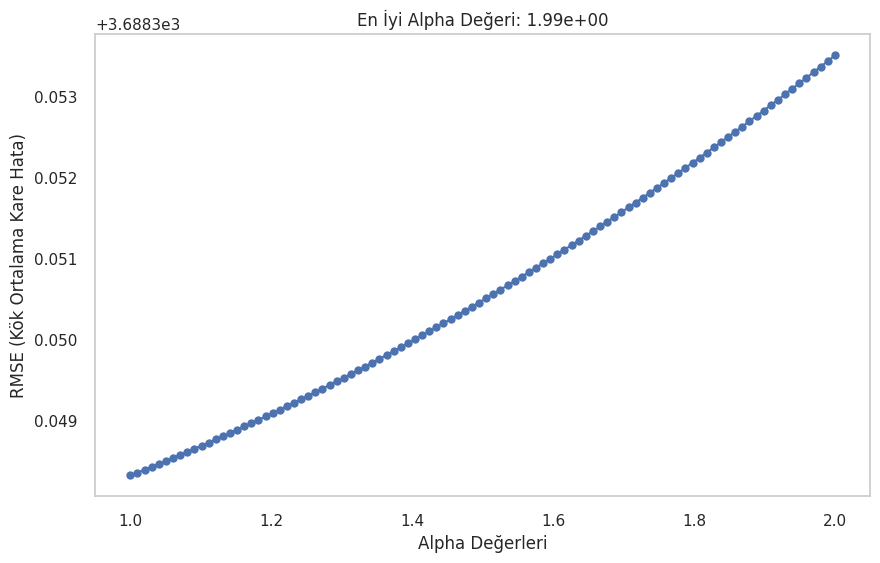

In [ ]:
rmse_values = []
for alpha in alpha_space:
    lasso_model = Lasso(alpha=alpha, max_iter=100000, random_state=42)
    lasso_model.fit(X, y)
    y_pred = lasso_model.predict(X)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    rmse_values.append(rmse)

# Alpha and  RMSE values
plt.figure(figsize=(10, 6))
plt.plot(alpha_space, rmse_values, marker='o')
#plt.xscale('log')  # X axis for log
plt.xlabel('Alpha')
plt.ylabel('RMSE ')
plt.title(f'The Best Alpha : {best_alpha:.2e}')
plt.grid()
plt.show()

In [ ]:
y_pred = lasso_cv_model.predict(X_test_scaled)   #Lasso(alpha =1.98)
y_train_pred = lasso_cv_model.predict(X_train_scaled)

In [ ]:
lcs = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_cv")
lcs

,lasso_cv_train,lasso_cv_test
R2,0.753,0.753
mae,2724.653,2752.123
mse,13461459.818,14898995.702
rmse,3668.986,3859.922


Feature skorlarına bakalım

In [ ]:
lasso_cv_model.coef_

array([-1668.79654988,  1619.66991418, -2011.40319147,   -12.56654884,
        4527.03226096,  -665.26857975,   782.79448276,  -974.571075  ])

In [ ]:
pd.concat([ls, ls_scale,rs, rcs, lss, lcs], axis = 1)

,linear_train,linear_test,LinearScale_train,LinearScale_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test
R2,0.753,0.753,0.753,0.753,0.753,0.753,0.753,0.753,0.753,0.753,0.753,0.753
mae,2724.572,2752.080,2724.572,2752.080,2724.579,2752.082,2724.615,2752.092,2724.610,2752.101,2724.653,2752.123
mse,13461414.431,14898192.717,13461414.431,14898192.717,13461414.834,14898292.714,13461428.208,14898790.918,13461425.885,14898598.102,13461459.818,14898995.702
rmse,3668.980,3859.818,3668.980,3859.818,3668.980,3859.831,3668.982,3859.895,3668.982,3859.870,3668.986,3859.922


## 6. Implement Elastic-Net

- Import the modul
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model
- Predict the test set
- Evaluate model performance (use performance metrics for regression)
- Tune alpha hyperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

## random state = 42

In [ ]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [ ]:
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42)
elastic_model.fit(X_train_scaled, y_train)

ElasticNet(alpha=1, random_state=42)

In [ ]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [ ]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es

,elastic_train,elastic_test
R2,0.698,0.692
mae,3068.369,3125.368
mse,16461384.391,18604362.153
rmse,4057.263,4313.277


Here scores is a bit worse than the other models.

In [ ]:
pd.concat([ls, ls_scale,rs, rcs, lss, lcs, es], axis = 1)

,linear_train,linear_test,LinearScale_train,LinearScale_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test
R2,0.753,0.753,0.753,0.753,0.753,0.753,0.753,0.753,0.753,0.753,0.753,0.753,0.698,0.692
mae,2724.572,2752.080,2724.572,2752.080,2724.579,2752.082,2724.615,2752.092,2724.610,2752.101,2724.653,2752.123,3068.369,3125.368
mse,13461414.431,14898192.717,13461414.431,14898192.717,13461414.834,14898292.714,13461428.208,14898790.918,13461425.885,14898598.102,13461459.818,14898995.702,16461384.391,18604362.153
rmse,3668.980,3859.818,3668.980,3859.818,3668.980,3859.831,3668.982,3859.895,3668.982,3859.870,3668.986,3859.922,4057.263,4313.277


Elastic CV

In [ ]:
model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error',
                                 'neg_root_mean_squared_error'], cv=5)

In [ ]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:]

,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.700,-3070.718,-15911466.377,-3988.918
2,0.708,-3088.610,-16320653.253,-4039.883
3,0.686,-3018.082,-15474202.178,-3933.726
4,0.686,-3163.461,-18406804.056,-4290.315
5,0.706,-3011.063,-16348250.549,-4043.297


In [ ]:
elastic_model.coef_

array([-1330.03995711,  1512.54460592, -1504.03918554,  -189.86776524,
        2353.27857472,   191.14731808,  1035.43149825,    50.17260091])

In [ ]:
alpha_space = np.linspace(1.8, 5, 100)

In [ ]:
elastic_cv_model = ElasticNetCV(alphas = alpha_space, l1_ratio=[0.1, 0.5, 0.7,0.9, 0.95, 1], cv = 5,
                                max_iter = 100000,random_state=42)

In [ ]:
elastic_cv_model.fit(X_train_scaled, y_train)

ElasticNetCV(alphas=array([1.8       , 1.83232323, 1.86464646, 1.8969697 , 1.92929293,
       1.96161616, 1.99393939, 2.02626263, 2.05858586, 2.09090909,
       2.12323232, 2.15555556, 2.18787879, 2.22020202, 2.25252525,
       2.28484848, 2.31717172, 2.34949495, 2.38181818, 2.41414141,
       2.44646465, 2.47878788, 2.51111111, 2.54343434, 2.57575758,
       2.60808081, 2.64040404, 2.67272727, 2.70505051, 2.73737374,
       2...
       4.06262626, 4.09494949, 4.12727273, 4.15959596, 4.19191919,
       4.22424242, 4.25656566, 4.28888889, 4.32121212, 4.35353535,
       4.38585859, 4.41818182, 4.45050505, 4.48282828, 4.51515152,
       4.54747475, 4.57979798, 4.61212121, 4.64444444, 4.67676768,
       4.70909091, 4.74141414, 4.77373737, 4.80606061, 4.83838384,
       4.87070707, 4.9030303 , 4.93535354, 4.96767677, 5.        ]),
             cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=100000,
             random_state=42)

In [ ]:
elastic_cv_model.alpha_

4.935353535353536

In [ ]:
elastic_cv_model.l1_ratio_

1.0

In [ ]:
y_pred = elastic_cv_model.predict(X_test_scaled)
y_train_pred = elastic_cv_model.predict(X_train_scaled)

In [ ]:
ecs = train_val(y_train, y_train_pred, y_test, y_pred, "elastic_cv")
ecs

,elastic_cv_train,elastic_cv_test
R2,0.753,0.753
mae,2724.801,2752.222
mse,13461693.833,14900352.930
rmse,3669.018,3860.098


In [ ]:
pd.concat([ls, ls_scale,rs, rcs, lss, lcs, es, ecs], axis = 1)

,linear_train,linear_test,LinearScale_train,LinearScale_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test,elastic_cv_train,elastic_cv_test
R2,0.753,0.753,0.753,0.753,0.753,0.753,0.753,0.753,0.753,0.753,0.753,0.753,0.698,0.692,0.753,0.753
mae,2724.572,2752.080,2724.572,2752.080,2724.579,2752.082,2724.615,2752.092,2724.610,2752.101,2724.653,2752.123,3068.369,3125.368,2724.801,2752.222
mse,13461414.431,14898192.717,13461414.431,14898192.717,13461414.834,14898292.714,13461428.208,14898790.918,13461425.885,14898598.102,13461459.818,14898995.702,16461384.391,18604362.153,13461693.833,14900352.930
rmse,3668.980,3859.818,3668.980,3859.818,3668.980,3859.831,3668.982,3859.895,3668.982,3859.870,3668.986,3859.922,4057.263,4313.277,3669.018,3860.098


In [ ]:
df1.head(10)

,price,km,Gears,age,Previous_Owners,hp_kW,Displacement_cc,Weight_kg,cons_comb
0,15770,56013.000,7.000,3.000,2.000,66.000,1422.000,1220.000,3.800
1,14500,80000.000,7.000,2.000,1.000,141.000,1798.000,1255.000,5.600
2,14640,83450.000,7.000,3.000,1.000,85.000,1598.000,1135.000,3.800
3,14500,73000.000,6.000,3.000,1.000,66.000,1422.000,1195.000,3.800
4,16790,16200.000,7.000,3.000,1.000,66.000,1422.000,1135.000,4.100
5,15090,63668.000,7.000,3.000,1.000,85.000,1598.000,1135.000,3.500
6,16422,62111.000,7.000,3.000,1.000,85.000,1598.000,1195.000,3.700
7,14480,14986.000,7.000,3.000,1.000,66.000,1422.000,1180.000,3.700
8,16700,57000.000,7.000,3.000,1.000,85.000,1598.000,1275.000,3.700
9,17990,16103.000,7.000,2.000,1.000,70.000,999.000,1135.000,4.200


In [ ]:
elastic_cv_model.coef_

array([-1666.90998967,  1618.83569769, -2010.57406945,   -10.47154924,
        4518.3014172 ,  -656.15493771,   779.57017478,  -967.48741916])

## Feature Importance

Here features are not removed. Elastic_net works best with lasso

#Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
elastic_model = ElasticNet(max_iter=10000, random_state=42)

In [ ]:
param_grid = {"alpha":[2, 2.5, 3, 4.9, 5.5, 6, 7, 7.5],
            "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [ ]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =5, verbose =2)

In [ ]:
grid_model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 56 candidates, totalling 280 fits
[CV] END ..............................alpha=2, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=2, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=2, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=2, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=2, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=2, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=2, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=2, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=2, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=2, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=2, l1_ratio=0.7; total time=   0.0s
[CV] END ..............................alpha=2,

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=10000, random_state=42),
             param_grid={'alpha': [2, 2.5, 3, 4.9, 5.5, 6, 7, 7.5],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [ ]:
grid_model.best_params_

{'alpha': 7, 'l1_ratio': 1}

In [ ]:
pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009,0.002,0.001,0.000,2,0.100,"{'alpha': 2, 'l1_ratio': 0.1}",-4807.330,-4933.356,-4697.210,-5164.294,-4932.043,-4906.847,155.864,41
1,0.010,0.001,0.001,0.000,2,0.500,"{'alpha': 2, 'l1_ratio': 0.5}",-4344.518,-4437.190,-4270.590,-4680.686,-4438.246,-4434.246,138.269,36
2,0.010,0.000,0.001,0.000,2,0.700,"{'alpha': 2, 'l1_ratio': 0.7}",-4063.699,-4125.518,-4006.411,-4375.063,-4128.278,-4139.794,125.912,30
3,0.010,0.003,0.001,0.000,2,0.900,"{'alpha': 2, 'l1_ratio': 0.9}",-3766.331,-3769.030,-3697.556,-4016.107,-3777.521,-3805.309,109.228,20
4,0.006,0.000,0.001,0.000,2,0.950,"{'alpha': 2, 'l1_ratio': 0.95}",-3703.878,-3680.688,-3613.873,-3919.517,-3693.788,-3722.349,103.474,17
5,0.008,0.002,0.001,0.000,2,0.990,"{'alpha': 2, 'l1_ratio': 0.99}",-3681.618,-3632.502,-3558.824,-3852.568,-3651.185,-3675.339,97.410,9
6,0.008,0.002,0.001,0.000,2,1,"{'alpha': 2, 'l1_ratio': 1}",-3686.199,-3630.549,-3551.723,-3841.525,-3650.628,-3672.125,95.480,8
7,0.007,0.004,0.001,0.000,2.500,0.100,"{'alpha': 2.5, 'l1_ratio': 0.1}",-5015.609,-5152.797,-4889.269,-5378.026,-5150.343,-5117.209,162.892,44
8,0.006,0.001,0.001,0.000,2.500,0.500,"{'alpha': 2.5, 'l1_ratio': 0.5}",-4503.515,-4609.366,-4417.475,-4848.697,-4609.637,-4597.738,144.658,37
9,0.005,0.000,0.001,0.000,2.500,0.700,"{'alpha': 2.5, 'l1_ratio': 0.7}",-4172.789,-4248.095,-4110.196,-4495.643,-4250.110,-4255.366,130.925,33


In [ ]:
grid_model.best_index_

48

In [ ]:
grid_model.best_score_

-3672.0745142319925

In [ ]:
y_pred = grid_model.predict(X_test_scaled) #ElasticNet({'alpha': 7, 'l1_ratio': 1})
y_train_pred = grid_model.predict(X_train_scaled)

In [ ]:
grs= train_val(y_train, y_train_pred, y_test, y_pred, "GridSearch")
grs

,GridSearch_train,GridSearch_test
R2,0.753,0.753
mae,2724.919,2752.323
mse,13461976.893,14901469.130
rmse,3669.057,3860.242


In [ ]:
models = pd.concat([ls, ls_scale,rs, rcs, lss, lcs, es, ecs, grs], axis = 1)
models

,linear_train,linear_test,LinearScale_train,LinearScale_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test,elastic_cv_train,elastic_cv_test,GridSearch_train,GridSearch_test
R2,0.753,0.753,0.753,0.753,0.753,0.753,0.753,0.753,0.753,0.753,0.753,0.753,0.698,0.692,0.753,0.753,0.753,0.753
mae,2724.572,2752.080,2724.572,2752.080,2724.579,2752.082,2724.615,2752.092,2724.610,2752.101,2724.653,2752.123,3068.369,3125.368,2724.801,2752.222,2724.919,2752.323
mse,13461414.431,14898192.717,13461414.431,14898192.717,13461414.834,14898292.714,13461428.208,14898790.918,13461425.885,14898598.102,13461459.818,14898995.702,16461384.391,18604362.153,13461693.833,14900352.930,13461976.893,14901469.130
rmse,3668.980,3859.818,3668.980,3859.818,3668.980,3859.831,3668.982,3859.895,3668.982,3859.870,3668.986,3859.922,4057.263,4313.277,3669.018,3860.098,3669.057,3860.242


## 7. Visually Compare Models Performance In a Graph

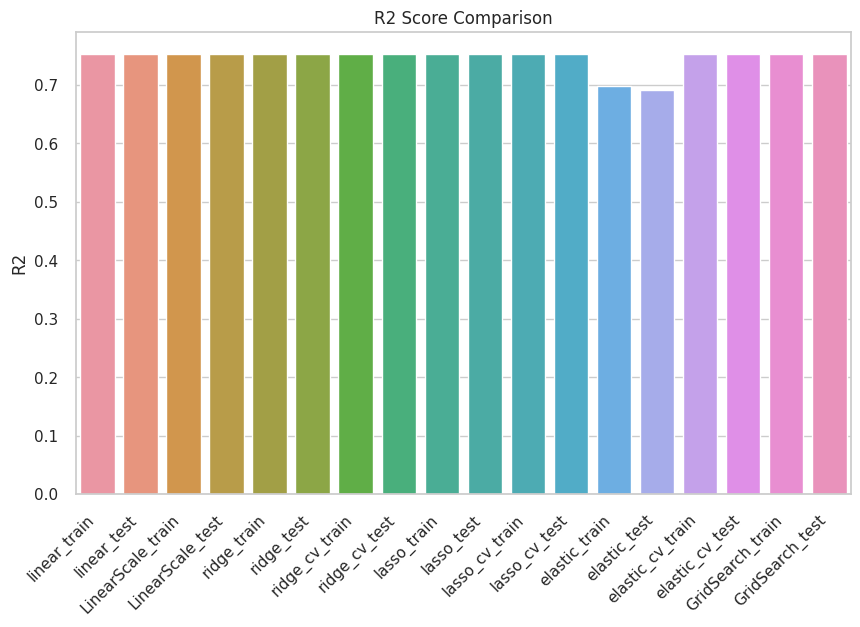

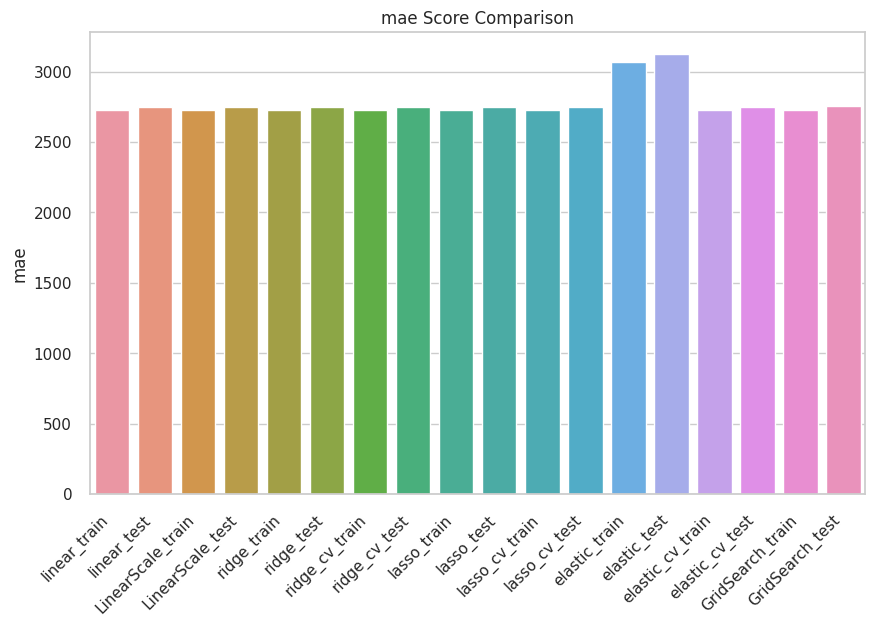

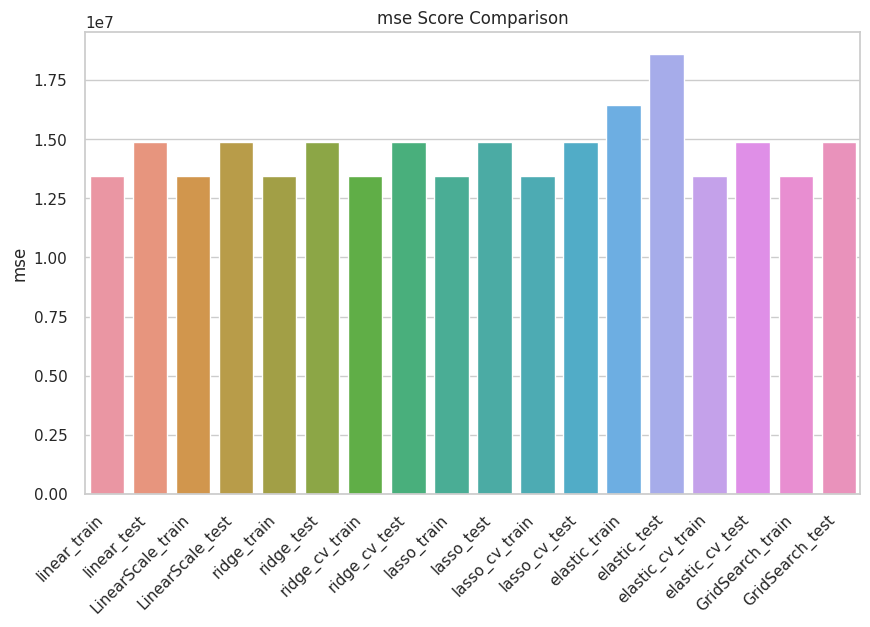

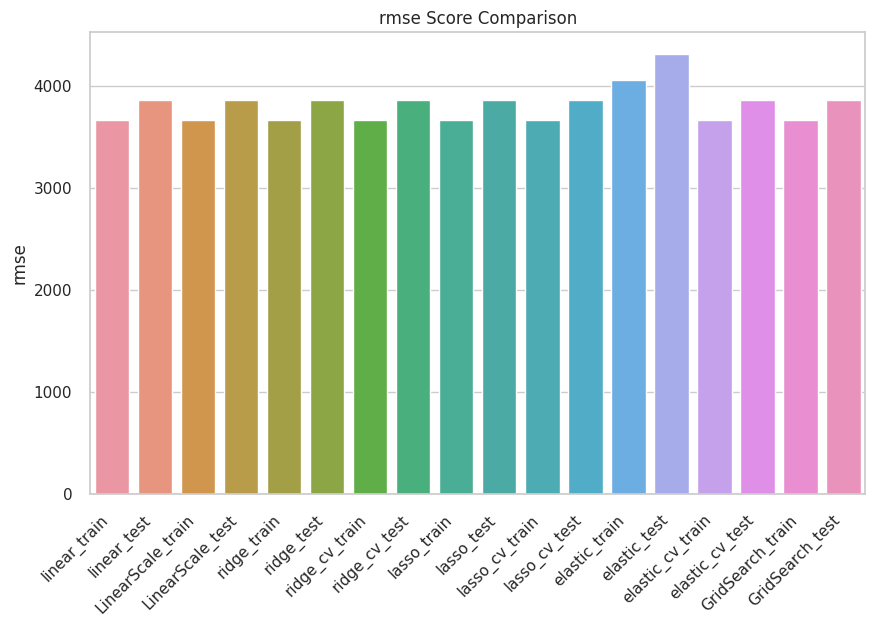

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

m = models.T
m.columns = ['R2', 'mae', 'mse', 'rmse']

# Metrikler için çubuk grafiği çizimi
metrics = ['R2', 'mae', 'mse', 'rmse']

for metric in metrics:
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=m.index, y=metric, data=m)
    ax.set(title=f'{metric} Score Comparison')
    plt.xticks(rotation=45, ha='right')  # Sütun isimlerini döndür
    plt.show()

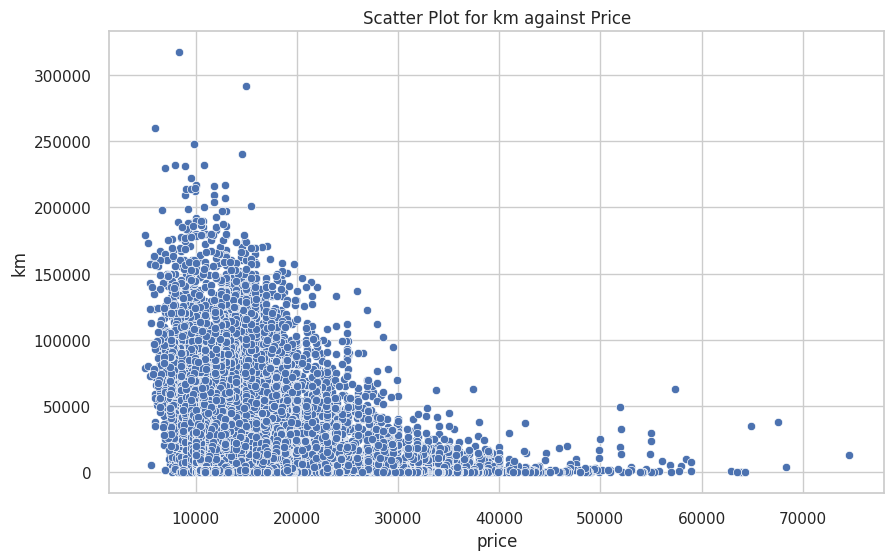

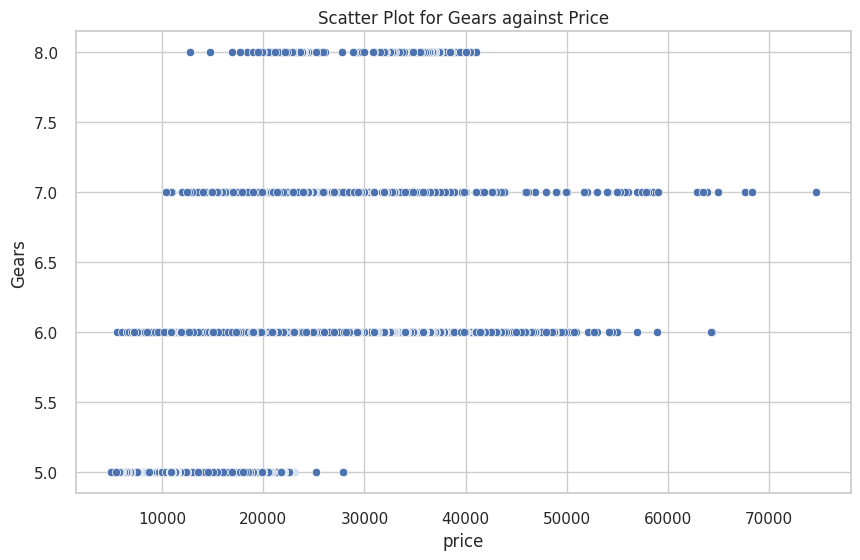

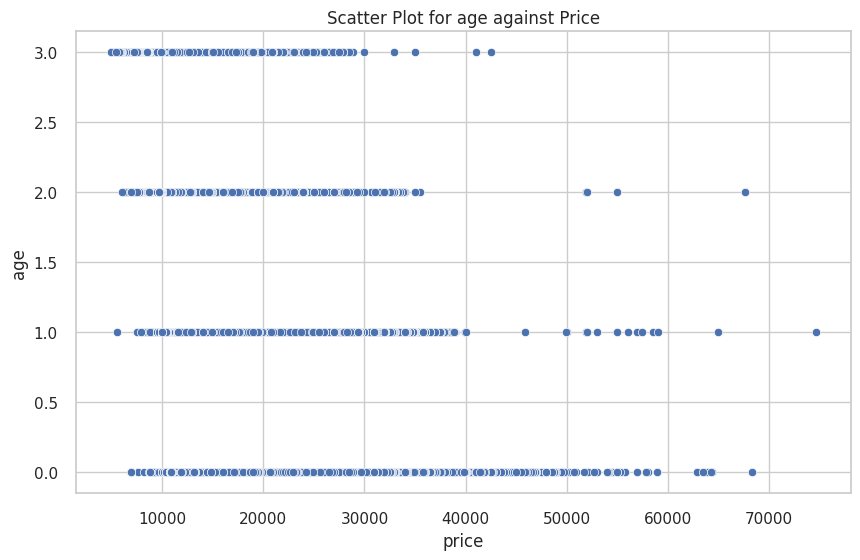

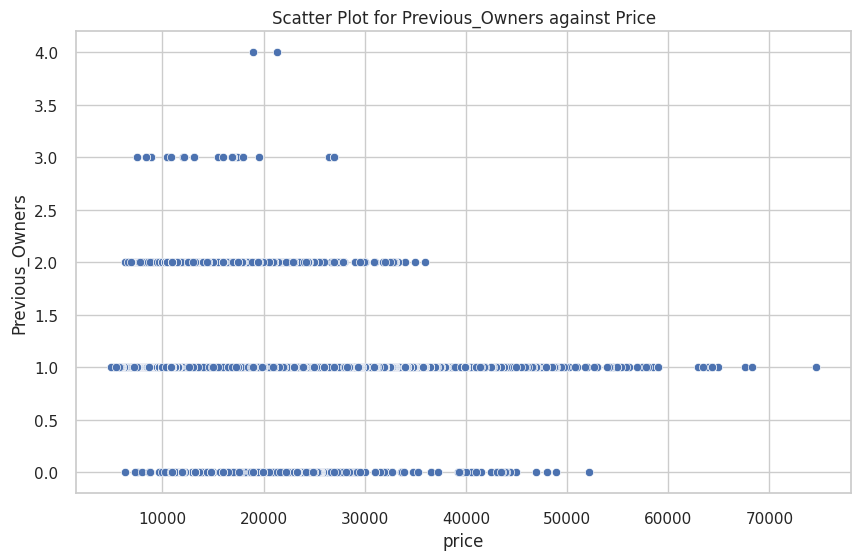

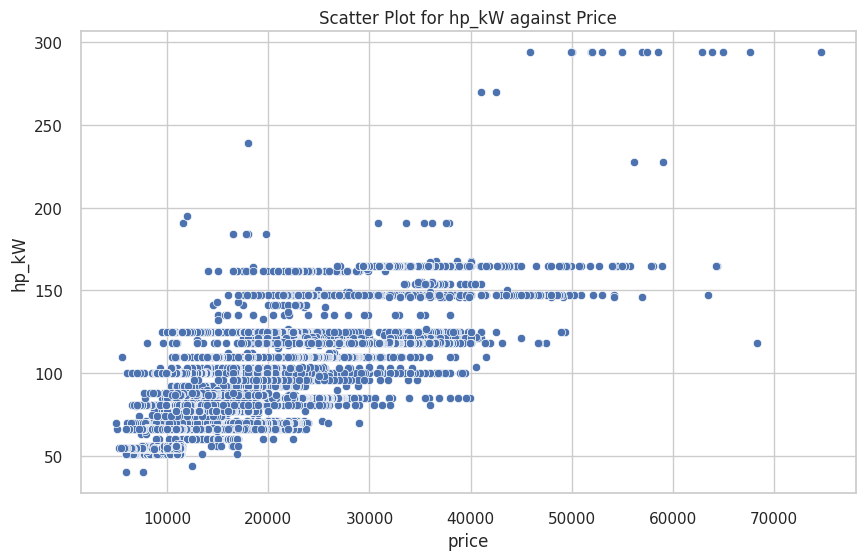

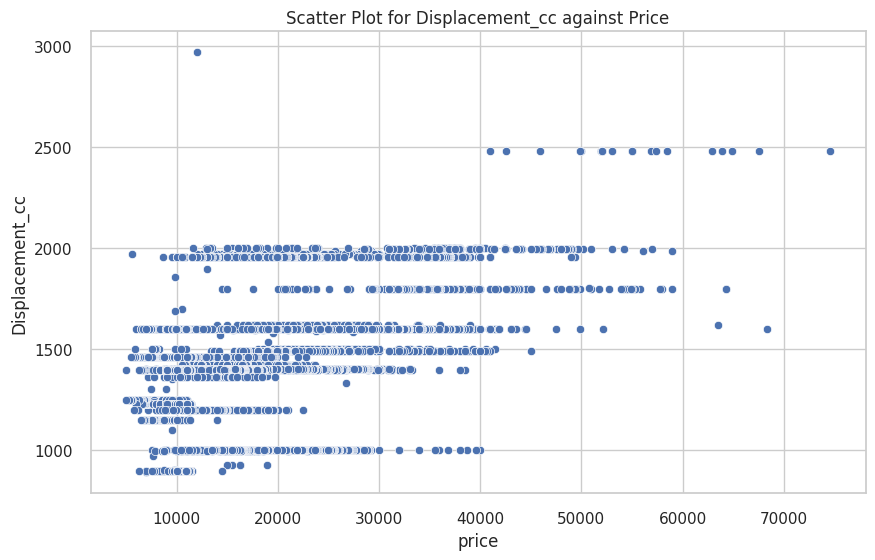

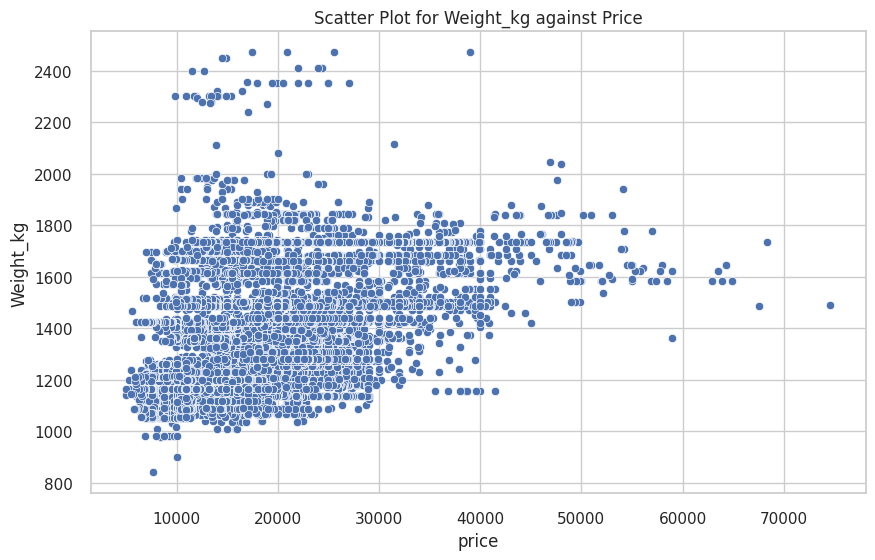

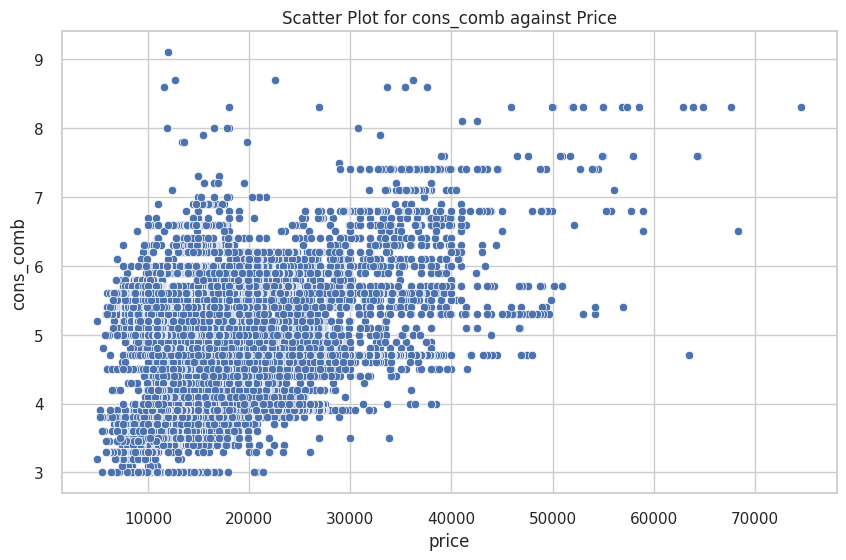

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt



df2 = df1[['price', 'km', 'Gears', 'age', 'Previous_Owners', 'hp_kW', 'Displacement_cc', 'Weight_kg', 'cons_comb']]

# we create a scatter plot for each column
columns_to_plot = df2.columns

# each column will be plotted in a separate sub-plot
for column in columns_to_plot[1:]:  # 'price' column is excluded
    plt.figure()
    sns.scatterplot(x='price', y=column, data=df2)
    plt.title(f'Scatter Plot for {column} against Price')
    plt.show()




#Feature importances with Ridge



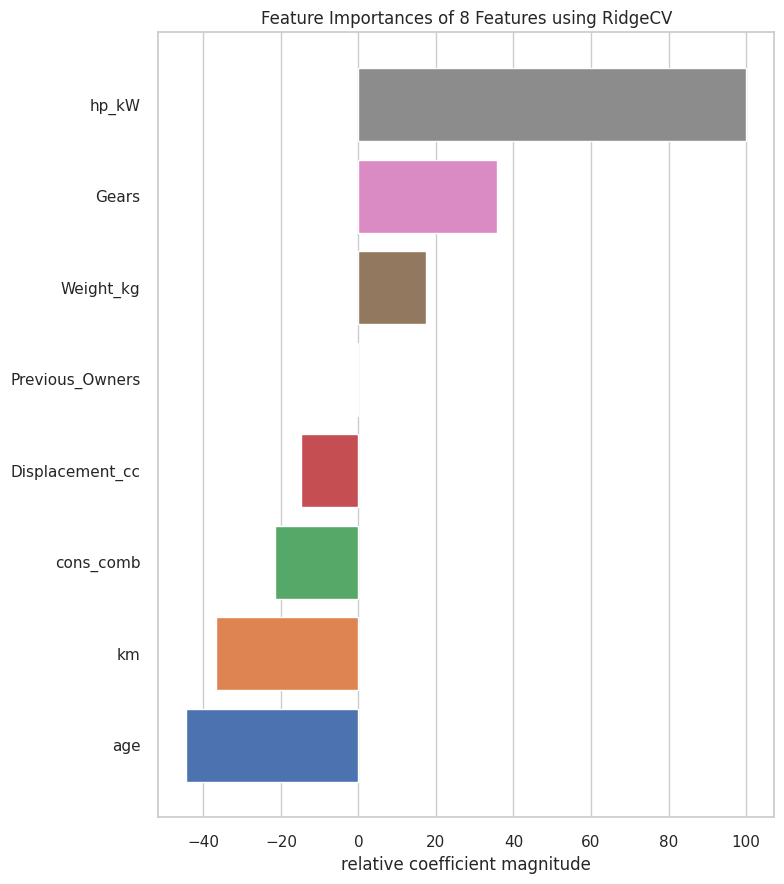

<Axes: title={'center': 'Feature Importances of 8 Features using RidgeCV'}, xlabel='relative coefficient magnitude'>

In [ ]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(ridge_cv_model, labels=pd.DataFrame(X_train).columns) #modeli veriyorum ve X_train column namelerini
visualizer = RadViz(size=(800, 900))
viz.fit(X_train, y_train)
viz.show()

#Feature importances with Lasso

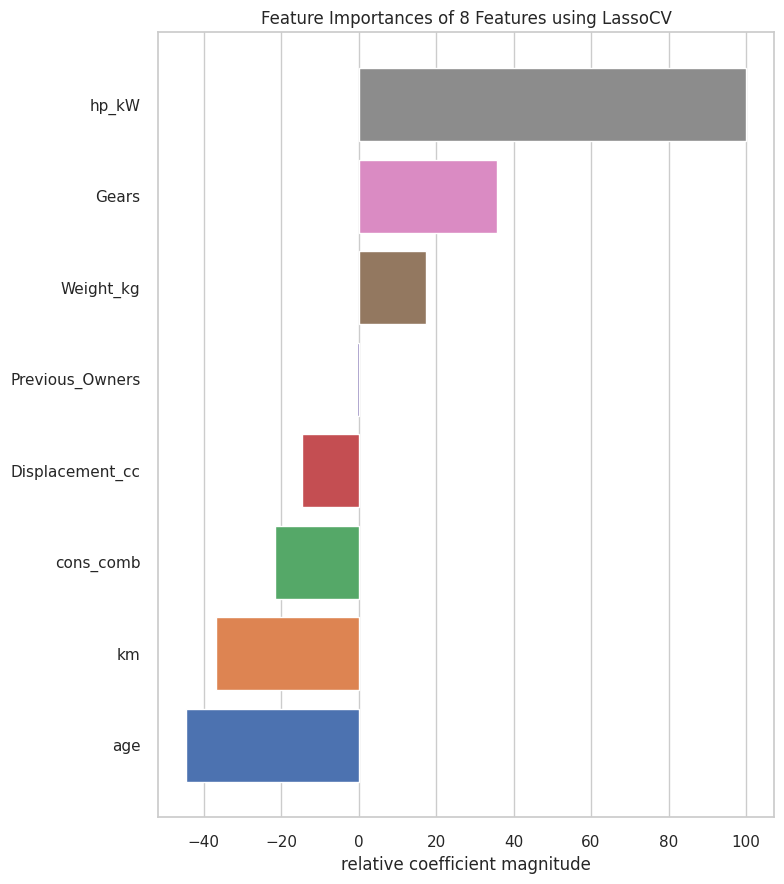

<Axes: title={'center': 'Feature Importances of 8 Features using LassoCV'}, xlabel='relative coefficient magnitude'>

In [ ]:
viz = FeatureImportances(lasso_cv_model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(800, 900))
viz.fit(X_train, y_train)
viz.show()

## Prediction new observation

## random state=42

In [ ]:
df1.head(1)

,price,km,Gears,age,Previous_Owners,hp_kW,Displacement_cc,Weight_kg,cons_comb
0,15770,56013.000,7.000,3.000,2.000,66.000,1422.000,1220.000,3.800


In [ ]:
#we produce random data to predict

In [ ]:


# Örnek veri seti
data = {
    'price': [15770, 14640, 14500, 16790, 15090, 16422, 14480, 16700, 17990],
    'km': [56013,  83450, 73000, 16200, 63668, 62111, 14986, 57000, 16103],
    'Gears': [7,  7, 6, 7, 7, 6, 7, 5, 7],
    'age': [3, 3, 3, 3, 2, 3, 3, 3, 2],
    'Previous_Owners': [2,  1, 1, 1, 2, 1, 1, 1, 1],
    'hp_kW': [66,  85, 66, 66, 70, 85, 66, 85, 70],
    'Displacement_cc': [1422,  1598, 1422, 1422, 1598, 1598, 1422, 1598, 999],
    'Weight_kg': [1220,  1135, 1195, 1135, 1135, 1195, 1180, 1275, 1135],
    'cons_comb': [3.8,  3.8, 3.8, 4.1, 3.5, 3.7, 3.7, 3.7, 4.2]
}

df = pd.DataFrame(data)

# Select a random row
existing_row = df.sample(1, random_state=42)

#
new_row = existing_row.copy()

#
new_row['price'] = np.random.randint(10000, 20000)
new_row['km'] = np.random.randint(5000, 100000)
new_row['Gears'] = np.random.randint(5, 8)
new_row['age'] = np.random.randint(1, 5)
new_row['Previous_Owners'] = np.random.randint(1, 3)
new_row['hp_kW'] = np.random.randint(60, 150)
new_row['Displacement_cc'] = np.random.randint(1000, 2000)
new_row['Weight_kg'] = np.random.randint(1000, 1500)
new_row['cons_comb'] = np.random.uniform(3.0, 5.0)


df4 = pd.concat([df, new_row], ignore_index=True)

df4.tail(1)


,price,km,Gears,age,Previous_Owners,hp_kW,Displacement_cc,Weight_kg,cons_comb
9,19136,16556,5,1,2,136,1368,1104,4.351


In [ ]:
X1 = df4.drop("price", axis =1)
y1 = df4["price"]

In [ ]:
y1

0    15770
1    14640
2    14500
3    16790
4    15090
5    16422
6    14480
7    16700
8    17990
9    19136
Name: price, dtype: int64

In [ ]:
X1

,km,Gears,age,Previous_Owners,hp_kW,Displacement_cc,Weight_kg,cons_comb
0,56013,7,3,2,66,1422,1220,3.800
1,83450,7,3,1,85,1598,1135,3.800
2,73000,6,3,1,66,1422,1195,3.800
3,16200,7,3,1,66,1422,1135,4.100
4,63668,7,2,2,70,1598,1135,3.500
5,62111,6,3,1,85,1598,1195,3.700
6,14986,7,3,1,66,1422,1180,3.700
7,57000,5,3,1,85,1598,1275,3.700
8,16103,7,2,1,70,999,1135,4.200
9,16556,5,1,2,136,1368,1104,4.351


In [ ]:
scaler = StandardScaler()


In [ ]:
scaler.fit(X1)

StandardScaler()

In [ ]:
X1_scaled = scaler.transform(X1)

In [ ]:
X1_scaled

array([[ 0.3952578 ,  0.75      ,  0.60302269,  1.52752523, -0.65932149,
        -0.1309285 ,  0.99969319, -0.25916661],
       [ 1.46853238,  0.75      ,  0.60302269, -0.65465367,  0.26861246,
         0.88419995, -0.73093657, -0.25916661],
       [ 1.05975156, -0.5       ,  0.60302269, -0.65465367, -0.65932149,
        -0.1309285 ,  0.49068444, -0.25916661],
       [-1.16213845,  0.75      ,  0.60302269, -0.65465367, -0.65932149,
        -0.1309285 , -0.73093657,  0.93466032],
       [ 0.69470442,  0.75      , -0.90453403,  1.52752523, -0.46396698,
         0.88419995, -0.73093657, -1.45299355],
       [ 0.63379804, -0.5       ,  0.60302269, -0.65465367,  0.26861246,
         0.88419995,  0.49068444, -0.65710893],
       [-1.20962743,  0.75      ,  0.60302269, -0.65465367, -0.65932149,
        -0.1309285 ,  0.18527919, -0.65710893],
       [ 0.43386705, -1.75      ,  0.60302269, -0.65465367,  0.26861246,
         0.88419995,  2.11951245, -0.65710893],
       [-1.16593287,  0.75      

In [ ]:
#X1.drop("y_pred", axis =1, inplace = True)
#X1

In [ ]:
y_pred = lin_reg.predict(X1_scaled)

In [ ]:
#df4.drop("y_pred", axis =1, inplace = True)

In [ ]:
#y1_pred = lasso_model.predict (X1_scaled)

In [ ]:
df4['y_pred'] = y_pred


In [ ]:
df4.head(10)

,price,km,Gears,age,Previous_Owners,hp_kW,Displacement_cc,Weight_kg,cons_comb,y_pred
0,15770,56013,7,3,2,66,1422,1220,3.800,15546.894
1,14640,83450,7,3,1,85,1598,1135,3.800,15951.146
2,14500,73000,6,3,1,66,1422,1195,3.800,12042.820
3,16790,16200,7,3,1,66,1422,1135,4.100,15650.683
4,15090,63668,7,2,2,70,1598,1135,3.500,18094.612
5,16422,62111,6,3,1,85,1598,1195,3.700,16668.618
6,14480,14986,7,3,1,66,1422,1180,3.700,18008.117
7,16700,57000,5,3,1,85,1598,1275,3.700,16255.836
8,17990,16103,7,2,1,70,999,1135,4.200,20824.069
9,19136,16556,5,1,2,136,1368,1104,4.351,31843.868


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance: ")
    print("---------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [ ]:
eval_metric (y1, y_pred)

Model testing performance: 
---------------------------
R2_score 	: -8.046678501652094
MAE 		: 2789.619725862379
MSE 		: 20035993.34015361
RMSE 		: 4476.158323847985
